In [189]:
import pandas as pd
import matplotlib.pyplot as plt
avtomobili = pd.read_csv('obdelani-podatki/avtomobili.csv')
pd.options.display.max_rows=20

# Uvod

Analiziral bom avtomobile znamke Volkswagen. Podatke sem črpal iz spletne strani [avto.net](https://www.avto.net/Ads/results.asp?znamka=Volkswagen), kjer se prodajajo stari in novi avtomobili. Bolj kot na oglase, lahko te avtomobile gledamo kot na bazo novih in rabljenih avtomobilov in opazujemo njihove lastnosti skozi leta. Za začetek si oglejmo nekaj osnovnih analiz.

In [190]:
modeli = avtomobili.groupby('model')

# Za izpis celotnega seznama modelov
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.options.display.max_rows=20
    
print_full(modeli.size())

model
-                1
Beetle           9
CC               7
Caddy           16
Caravelle        2
CrossGolf        1
CrossTouran      3
Fox              4
Golf           304
Hrošč            2
Jetta            7
Lupo             5
Multivan         5
Passat         328
Polo            58
Scirocco         6
Sharan          25
T-Roc            2
Tiguan          19
Touareg         25
Touran          73
Transporter     11
up!              3
dtype: int64


In [191]:
len(avtomobili)

916

Opazimo, da se je pri našem regularnem izrazu pojavila napak oz. da vzorec enega oglasa avtomobila ni bil v skladu z drugimi. Ker je naših avtomobilov 916, lahko mirne vesti ta podatek kar izbrišemo, saj načeloma ne bo vplival na rezultate.

In [192]:
avtomobili = avtomobili[avtomobili.model != '-']

In [193]:
avtomobili.sort_values('model')

,model,letnik,prevozeni_kilometri,gorivo,prostornina_v_ccm,moc_v_kW,menjalnik,cena_v_evrih
1,Beetle,2000,203000,bencin,1984,85,ročni,1390
2,Beetle,2013,53343,bencin,1390,118,ročni,14970
3,Beetle,2005,167900,dizel,1896,74,ročni,4450
4,Beetle,1999,232000,dizel,1896,66,ročni,2650
5,Beetle,2012,175000,dizel,1598,77,ročni,10200
6,Beetle,2000,289000,dizel,1896,66,ročni,1450
7,Beetle,2013,122000,dizel,1968,103,ročni,12888
8,Beetle,1999,280500,dizel,1896,66,ročni,2990
9,Beetle,2003,223000,dizel,1896,66,ročni,2000
16,CC,2013,166000,dizel,1968,103,ročni,14350


Zdaj, ko smo odpravili nezaželjene podatke, si oglejmo, koliko modelov Volkswagnov je v naših podatkih in katerih  modelov je največ.

In [194]:
modeli = avtomobili.groupby('model')
len(modeli)

22

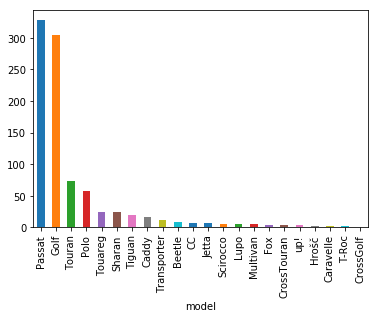

In [195]:
modeli.size().sort_values(ascending=False).plot.bar()

Torej, imamo 22 modelov avtomobilov znamke Volkswagen, največ je Passatov in Golfov. Poglejmo si nekaj hipotez.

# Sprememba cene glede na prevožene kilometre oz. leto

 Ker avtomobili ne spadajo v isti razred, to pomeni, da ima npr, Passat višjo vrednost kot Polo, bomo modele obravnavali posebaj. Oglejmo si recimo prvih 6 najbolj priljubljenih modelov avtomobilov.

In [196]:
# Definirajmo pomožni funkciji za risanje grafov

def izrisi_graf_modela(mod, lastnost, ax=None, fsize=(15,5)):
    ax = avtomobili[avtomobili.model == mod].plot(
        x=lastnost, y='cena_v_evrih', kind='scatter', ax=ax, figsize=fsize
    )
    ax.set_xlabel(lastnost)
    if lastnost == 'letnik':
        ax.invert_xaxis()
    
def narisi_dva_hkrati(mod1, mod2, lastnost):
    def naslov(mod):
        if mod[-1] in 'iou':
            mod = mod + '-ti'
        elif mod[-1] == 'a':
            mod = mod[:-1] + '-e'
        elif mod[-1] == 'e':
            mod = mod + '-i'
        else:
            mod = mod + '-i'
        return plt.title(mod)
    ax1 = plt.subplot(121)
    izrisi_graf_modela(mod1, lastnost, ax=ax1)
    naslov(mod1)
    ax2 = plt.subplot(122)
    izrisi_graf_modela(mod2, lastnost, ax=ax2)
    naslov(mod2)
    
modeli = [
    'Passat', 'Golf', 'Touran', 'Polo', 
    'Touareg', 'Sharan', 'Tiguan', 'Caddy', 
    'Transporter', 'Beetle', 'CC', 'Jetta'
]
    
def cena_kilometri(i,j):
    return narisi_dva_hkrati(modeli[i], modeli[j], 'prevozeni_kilometri')
    
def cena_letnik(i,j):
    return narisi_dva_hkrati(modeli[i], modeli[j], 'letnik')

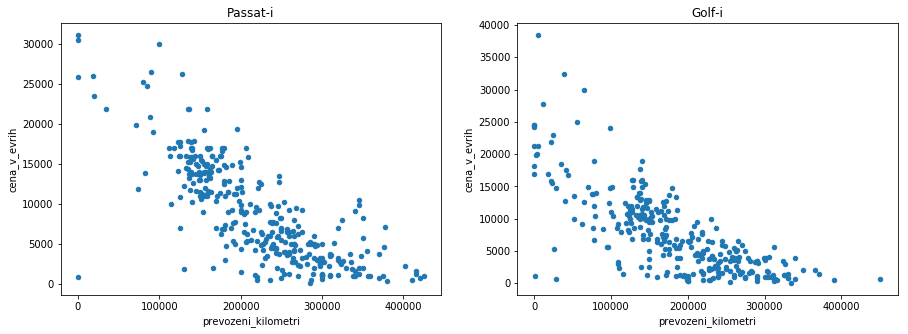

In [197]:
cena_kilometri(0,1)

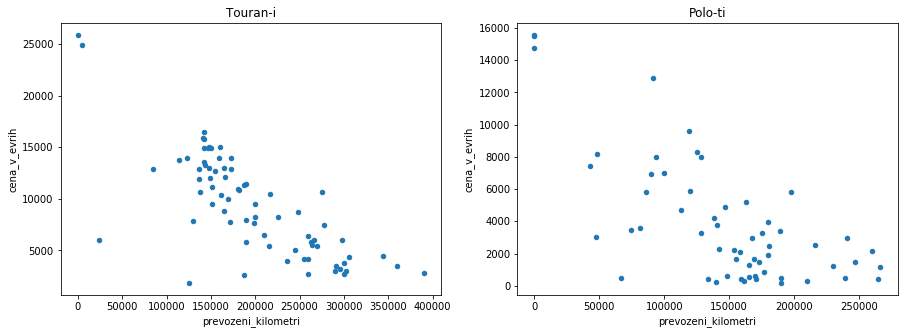

In [198]:
cena_kilometri(2,3)

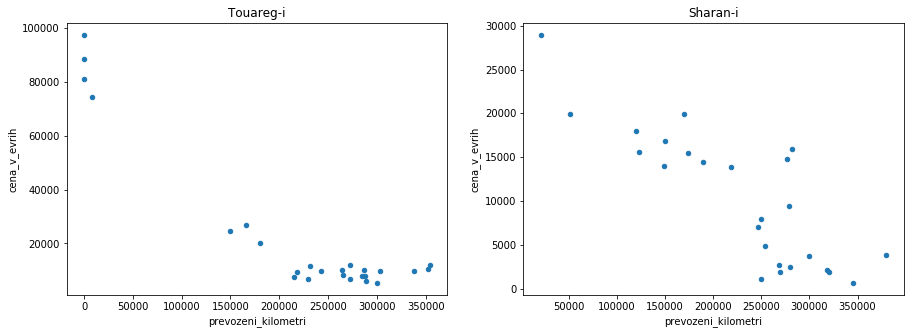

In [199]:
cena_kilometri(4,5)

Iz grafov je razvidno, da cena strmo pada v primerjavi s prevoženimi kilometri. Na grafu, kjer smo primerjali ceno in kilometre Passatov, vidimo, da je ima en Passat ceno 0 oz. blizu 0, ima pa zelo malo prevoženih kilometrov. Enako se zgodi pri Golfih in Touranih. Poglejmo si vse take avtomobile, za katere slutimo, da imajo prenizko ceno glede na opravljene kilometre.

In [200]:
avtomobili[
    (avtomobili.cena_v_evrih < 5000) & (avtomobili.prevozeni_kilometri < 50000)
][['model', 'prevozeni_kilometri', 'cena_v_evrih', 'letnik']]

,model,prevozeni_kilometri,cena_v_evrih,letnik
59,Golf,330,1100,1999
166,Golf,27900,600,1991
382,Passat,350,850,1998
730,Polo,47520,2999,2006
909,Transporter,26000,1600,1998


Slutimo, da gre za napako v vnašanju prevoženih kilometrov. Verjetno ima Golf pod številko 59 glede na letnik in ceno 330000 prevoženih kilometrov. Enako sklepamo za ostale avtomobile. V oči nekoliko bode samo Polo pod številko 730. Lahko se zgodi, da je ta avtomobil karamboliran.

Poglejmo si še spremembo cene glede na letnik za istih 6 modelov:

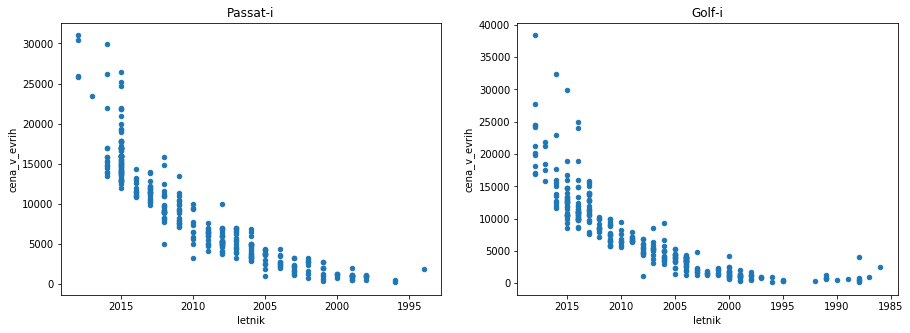

In [201]:
cena_letnik(0,1)

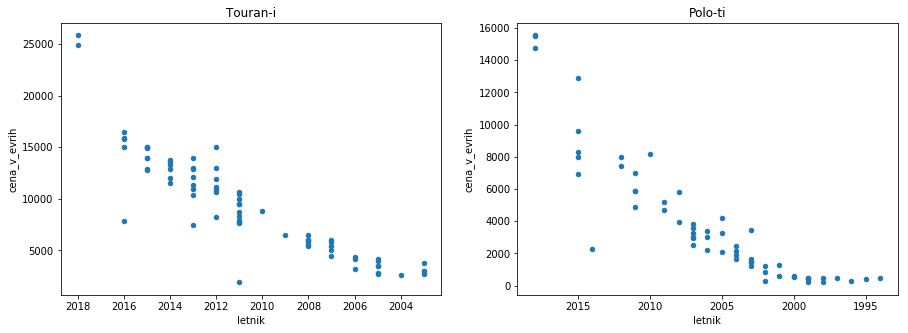

In [202]:
cena_letnik(2,3)

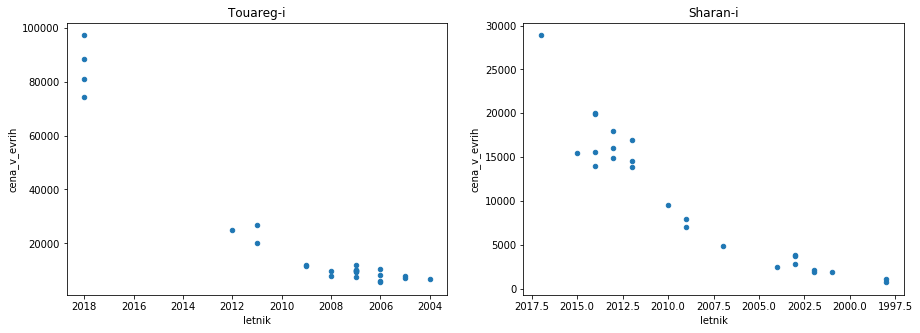

In [203]:
cena_letnik(4,5)

Tako kot pri primerjavi cene in prevoženih kilometrov ugotovimo, da cena s starostjo avtomobila pada. Opazimo pa, da okoli leta cena znova začne rasti. Namreč, avto pri 25 letih postane oldtimer, kateri imajo znova visoke cene zaradi zgodovinske vrednosti.

Da bi videli, kateri modeli najbolje ohranjajo ceno skozi leto, poglejmo še odvisnost cene od letnika naslednjih 6 najpogostejših modelov.

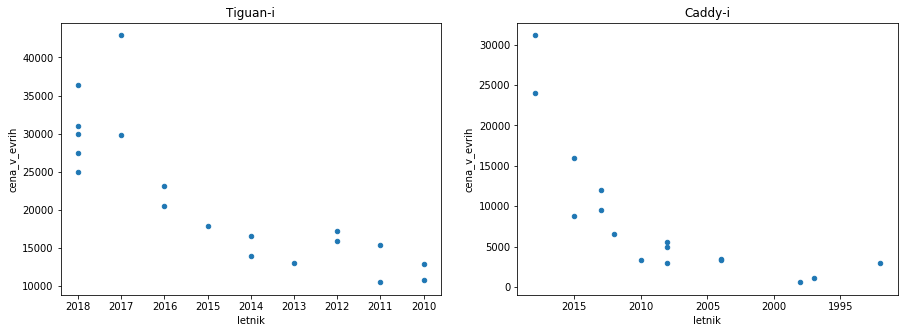

In [204]:
cena_letnik(6,7)

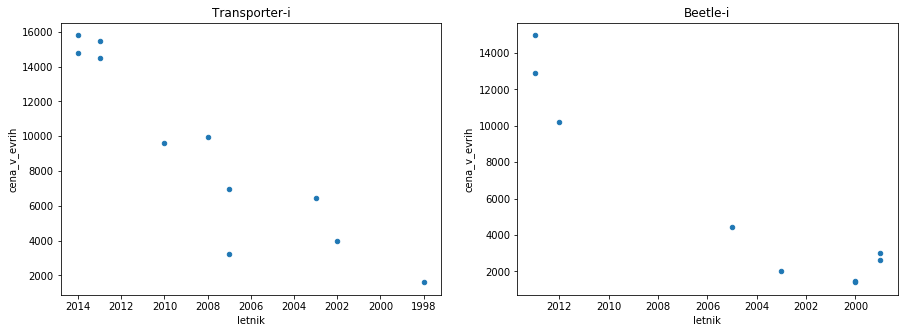

In [205]:
cena_letnik(8,9)

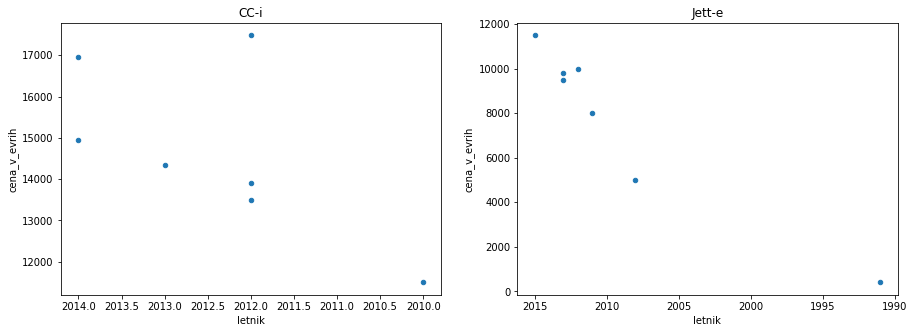

In [206]:
cena_letnik(10,11)

Razvidno je, da ceno najbolje ohranjajo CC-i, Transporterji, Tourani in Poloti, ker je njihov graf najmanj strm. Po drugi strani je razvidno, da ceno najslabše ohranjajo Caddy-i in Touaregi (ker je njihov graf najbolj strm).

# S katerim avtomobilom bomo naredili največ kilometrov

Poglejmo si, s katerimi avtomobili lahko naredimo največ kilometrov. Recimo, da je meja za veliko kilometrov 350000. Poglejmo, koliko avtomobilov posameznega modela ima opravljeno več kot toliko kilometrov.

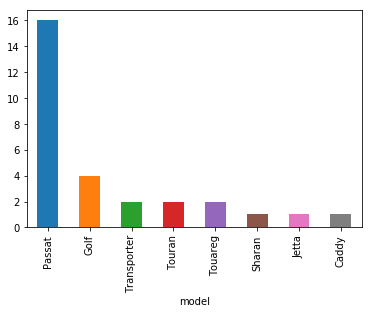

In [207]:
avtomobili[avtomobili.prevozeni_kilometri > 350000].groupby('model').size().sort_values(ascending=False).plot.bar()

Uredimo še vse avtomobile po kilometrih padajoče, da vidimo, kateri avtomobil ima največ kilometrov.

In [208]:
avtomobili.sort_values('prevozeni_kilometri', ascending=False)[:10]

,model,letnik,prevozeni_kilometri,gorivo,prostornina_v_ccm,moc_v_kW,menjalnik,cena_v_evrih
355,Jetta,1991,493779,dizel,1581,51,ročni,400
114,Golf,1989,451000,dizel,1588,40,ročni,700
543,Passat,1999,425000,dizel,1896,85,ročni,1000
386,Passat,1999,420000,dizel,1896,81,ročni,700
490,Passat,2002,415000,dizel,1896,81,ročni,1250
620,Passat,2002,415000,dizel,1896,96,ročni,1650
432,Passat,1996,410000,dizel,1990,110,ročni,550
905,Transporter,2007,405000,dizel,2496,96,ročni,3250
606,Passat,2003,402211,dizel,1896,96,ročni,2290
317,Golf,1999,390000,dizel,1896,81,ročni,530


Največ kilometrov ima torej Jetta pod številko 355 in sicer skoraj 500000 km. Lahko pa sklepamo, da z nobenim Volkswagnovim avtomobilom ne moremo opraviti več kot 500000 km.

Poglejmo še, koliko kilometrov povprečno opravi avtomobil v enem letu:

In [209]:
(avtomobili[avtomobili.letnik != 2018].prevozeni_kilometri / (2018 - avtomobili[avtomobili.letnik != 2018].letnik)).describe()

count      880.000000
mean     27305.428756
std      15135.520928
min         17.368421
25%      16840.663876
50%      23803.114286
75%      35071.428571
max      82500.000000
dtype: float64

Opazimo, da je povprečna vrednost prevoženih kilometrov v enem letu enaka nekaj manj kot 30000 kilometrov.

# Prostornina in moč avtomobilov

V tem kratkem poglavju si poglejmo, kateri avtomobil je najmočnejši in najšibkejši, kateri ima največjo in najmanjšo prostornino in kako sta poveyana moč in prostornina motorja.

In [210]:
avtomobili[['model', 'moc_v_kW']].sort_values('moc_v_kW')

,model,moc_v_kW
347,Hrošč,27
748,Polo,37
745,Polo,37
749,Polo,37
721,Polo,37
706,Polo,37
323,Golf,37
741,Polo,37
146,Golf,37
357,Lupo,37


Najšibkejši so Polo, Lupo, Golf in Hrošč, najmočnejši pa Golf in Touareg (domnevamo, da se je pri modelu up! zgodila napaka pri vnosu moči). Kako to, da je lahko Golf hkrati najšibkejši in najmočnejši? To je posledica dejstva, da v isti model vgrajujejo drugačne motorje.

Oglejmo si še prostornino.

In [211]:
avtomobili[['model', 'prostornina_v_ccm']].sort_values('prostornina_v_ccm')

,model,prostornina_v_ccm
909,Transporter,50
915,up!,55
750,Polo,129
748,Polo,999
339,Golf,999
721,Polo,999
736,Polo,999
745,Polo,999
706,Polo,999
743,Polo,999


Noben avto ne more imeti prostornine manjše od 999 ccm, zato spet opazimo napako pri vnosu prostornine za avtomobile pod 909, 915, 750. Vidimo pa, da so avtomobili z najmanjšo prostornino Golfi in Poloti, z največjo pa Touaregi in Passati. Oglejmo si grafa, ki predstavljata, koliko je avtomobilov z isto močjo/prostornino.

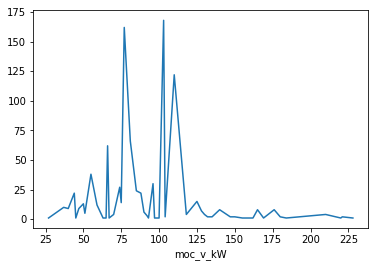

In [212]:
avtomobili[avtomobili.moc_v_kW < 900].groupby('moc_v_kW').size().plot()

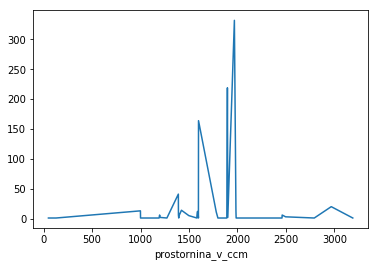

In [213]:
avtomobili.groupby('prostornina_v_ccm').size().plot()

Očitno je, da ima največ avtomobilov prostornino okoli 2000 ccm in moč okoli 100 kW.

Oglejmo si še povezavo med prostornino in močjo:

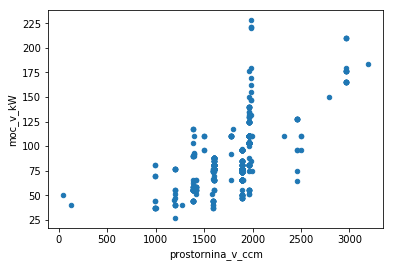

In [214]:
avtomobili[avtomobili.moc_v_kW < 900].plot(x='prostornina_v_ccm', y='moc_v_kW', kind='scatter')

Opazimo, da moč v primerjavi z prostornino približno linearno narašča.

# Popularnost avtomobilov po petletjih

Za konec bi radi ugotovili, kateri avtomobili najbolj popularni v določenih petletjih. Petletje bo predstavljalo prvo leto petletja (tj. 1970 bo predstavljalo petletje od 1970 do vključno 1974). Najprej vsak avtomobil uvrstimo v določeno petletje in poglejmo, koliko avtomobilov je v posameznih petletjih (v zadnjem petletju bo seveda manj avtomobilov, ker ni celo petletje):

petletje
1970      1
1975      1
1985      8
1990     10
1995     62
2000    143
2005    227
2010    268
2015    195
dtype: int64


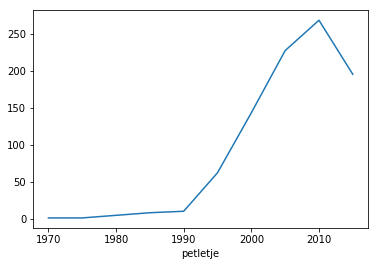

In [215]:
avtomobili['petletje'] = 5 * (avtomobili.letnik // 5)
print(avtomobili.groupby('petletje').size())
avtomobili.groupby('petletje').size().plot()

In [216]:
modeli_po_petletjih = avtomobili.groupby(['petletje', 'model']).size()
print_full(modeli_po_petletjih)

petletje  model      
1970      Hrošč           1
1975      Hrošč           1
1985      Golf            8
1990      Caddy           1
          Golf            6
          Jetta           1
          Passat          1
          Polo            1
1995      Beetle          2
          Caddy           2
          Caravelle       1
          Golf           25
          Lupo            1
          Passat         19
          Polo            9
          Sharan          2
          Transporter     1
2000      Beetle          3
          Caddy           2
          Caravelle       1
          Golf           58
          Lupo            4
          Multivan        1
          Passat         43
          Polo           16
          Sharan          7
          Touareg         1
          Touran          5
          Transporter     2
2005      Beetle          1
          Caddy           3
          CrossTouran     1
          Fox             4
          Golf           62
          Jetta           

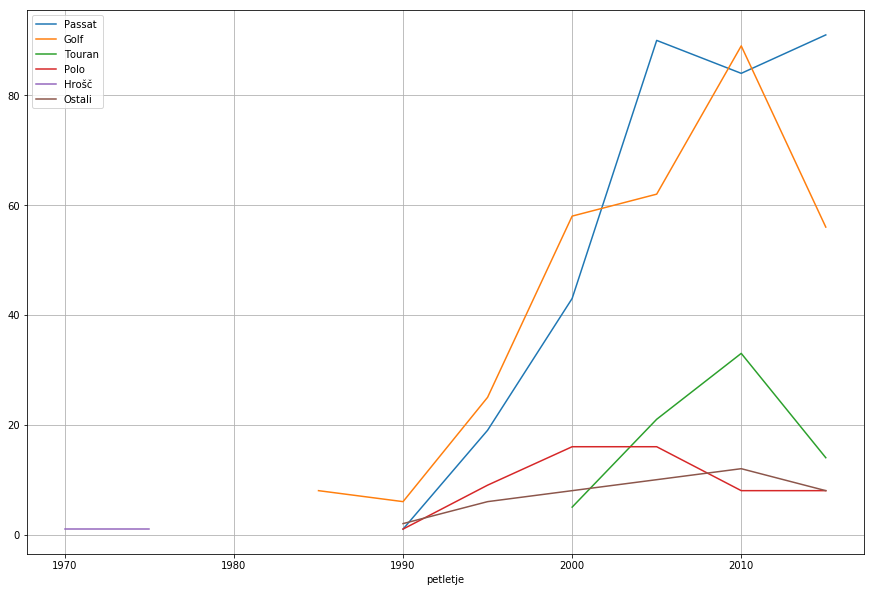

In [220]:
modeli_po_petletjih = avtomobili.groupby(['model', 'petletje']).size().reset_index()

def df_model(mod):
    return modeli_po_petletjih[modeli_po_petletjih.model == mod]

ax = plt.gca()

def narisi(mod):
    df_model(mod).plot(x='petletje', y=0, label=mod, ax=ax, figsize=(15,10))

narisi('Passat')
narisi('Golf')
narisi('Touran')
narisi('Polo')
narisi('Hrošč')

ostali = modeli_po_petletjih[(modeli_po_petletjih.model != 'Passat') & (modeli_po_petletjih.model != 'Golf')
                             & (modeli_po_petletjih.model != 'Touran') & (modeli_po_petletjih.model != 'Polo')
                             & (modeli_po_petletjih.model != 'Hrošč')
                            ]

ostali.groupby('petletje').size().plot(x='petletje', y=0, label='Ostali', ax=ax, figsize=(15,10))
plt.legend()
plt.grid(1)

V petletju 1970 in 1975 je bil edini model Hrošč. Od leta 1985 do vključno 1995 traja prevlada Golfa. V naslednjih petletjih je lepo razvidno, da močno izstopata Golf in Passat. Z izjemo petletja 2005 in 2015 (takrat namreč prevladuje Passat), od leta 1995 naprej prevladuje Golf. Izpostaviti se spodobi še Tourana v petletju 2010, ko je z lahkoto zasedel tretje mesto.

# Zaključek

Rezultati so bili večinoma po pričakovanjih. Mogoče nas je presenetila logična stvar: da avtomobilom po 25 letu starosti zaradi statusa oldtimerja začne rasti cena. So pa bili analizirani le modeli znamke Volkswagen in mogoče bi se rezultati nekoliko razlikovali, če bi primerjali modele kakšne druge znamke.